# **Estimation of Obesity Levels Based On Eating Habits and Physical Condition**


This project presents a machine learning approach to a multiclass classification problem. The goal is to classify each individual in the dataset into one of seven obesity levels, ranging from insufficient weight to obesity type III, based on the target variable "NObeyesdad".
The dataset consists of 2,111 instances (individuals) from Mexico, Peru, and Colombia, described by 17 features related to lifestyle habits and physical conditions. These features include dietary patterns, physical activity, and other health-related attributes that may influence the obesity level.


**Where to get the dataset**

This dataset is available in the **UC Irvine Machine Learning Repository**:

[Estimation of Obesity Levels Based On Eating Habits and Physical Condition](https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition).

More information about the creation of the dataset can be found in this [article](https://doi.org/10.1016/j.dib.2019.104344).


**Dataset overview**

* Number of instances: 2111
* Number of features: 16 + 1 target
* Target variable:

      0 -> Insufficient Weight

      1 -> Normal Weight

      2 -> Overweight Level I

      3 -> Overweight Level II

      4 -> Obesity Type I

      5 -> Obesity Type II

      6 -> Obesity Type III

**How was it obtained?**

The dataset was collected through an online survey designed to capture lifestyle and nutrition-related information. Participants answered questions about their daily habits, such as eating behavior, physical activity, and technology use.

A complete explanation of all variables, including the possible answer options and details on how each variable was represented and processed in the dataset, is available in the [variable_description.md](https://github.com/martinamarotta/Obesity_Levels_ML_project/blob/main/variable_description.md) file on the project’s GitHub repository.

**Variables Description**:


**1. Gender** – Biological sex of the individual.

**2. Age** – Age of the individual (14–61 years).

**3. Height** – Height of the individual in meters.

**4. Weight** – Weight of the individual in kilograms.

**5. Family history with overweight** – Binary variable indicating whether any family member has suffered or suffers from overweight.

**6. FAVC (Frequent consumption of high caloric food)** – Frequency of consuming high-calorie foods.

**7. FCVC (Frequency of consumption of vegetables)** – Frequency of consuming vegetables.

**8. NCP (Number of main meals)**  – Number of main meals consumed daily.

**9. CAEC (Consumption of food between meals)** – Indicates whether the individual eats between main meals.

**10. SMOKE** – Indicates whether the individual smokes.

**11. CH2O(Consumption of water daily)** – Daily water consumption in liters.

**12. SCC (Calories consumption monitoring)** – Indicates whether the individual monitors calorie intake.

**13. FAF (Physical activity frequency)** – Frequency of physical activity or exercise.

**14. TUE (Time using technology devices)** – Daily time spent using technology devices.

**15. CALC (Consumption of alcohol)** – Indicates whether the individual consumes alcohol.

**16. MTRANS(Transportation used)** – Main mode of transportation used (bike, motorbike, walking, automobile, public transportation).

**17. NObeyesdad** – Classification of the individual’s obesity level.


**Dataset Composition**

It is important to note that only 23% of the records originate from real survey data, while the remaining 77% were synthetically generated using the SMOTE technique in order to balance the classes. This means that the dataset does not perfectly reflect real-world distributions of obesity levels, but rather provides a balanced and controlled scenario for testing and comparing classification algorithms.

## **0. Setup**

In [54]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

# Preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, label_binarize
from sklearn.feature_selection import SelectKBest, f_classif, RFE


# Model selection & evaluation
from sklearn.pipeline import Pipeline
from sklearn.model_selection import (
    train_test_split,
    KFold,
    StratifiedKFold,
    GridSearchCV,
    cross_val_score,
    cross_validate
)
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    log_loss,
    roc_auc_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    RocCurveDisplay,
    auc
)
from sklearn.utils.multiclass import type_of_target

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import warnings
from sklearn.exceptions import UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)
warnings.filterwarnings("ignore", category=UserWarning)



##**1. Data Loading and Exploration**

In [55]:
# Load the obesity dataset CSV file into a pandas DataFrame
my_file = 'ObesityDataSet.csv'
obesity = pd.read_csv(my_file)

In [56]:
obesity

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [57]:
print(obesity.shape)

(2111, 17)


In [58]:
obesity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [59]:
""" Bin the 'CH2O', 'FCVC' and 'NCP' features into 3 categories based on their value range"""

obesity['CH2O'] = pd.cut(
    obesity['CH2O'],
    bins=[-np.inf, 1.5, 2.5, np.inf], # Define intervals: (-∞,1.5], (1.5,2.5], (2.5,∞)
    labels=[1, 2, 3]                  # Assign labels 1, 2, 3 for the respective bins
)
# Convert the categorical bins into integer values
obesity['CH2O'] = obesity['CH2O'].astype(int)

obesity['FCVC'] = pd.cut(
    obesity['FCVC'],
    bins=[-np.inf, 1.5, 2.5, np.inf],
    labels=[1, 2, 3]
)
obesity['FCVC'] = obesity['FCVC'].astype(int)

obesity['NCP'] = pd.cut(
    obesity['NCP'],
    bins=[-np.inf, 2.5, 3.5, np.inf], # Define intervals: (-∞,2.5], (2.5,3.5], (3.5,∞)
    labels=[1, 2, 3]
)
obesity['NCP'] = obesity['NCP'].astype(int)


During the initial data exploration, it was observed that some features originally derived from categorical survey responses, such as: CH2O (daily water consumption), FCVC (frequency of vegetable consumption), and NCP (number of main meals per day) were represented as continuous numerical values in the dataset.
To make these variables more interpretable and consistent with their original survey meaning, they were discretized into categorical bins reflecting the answer options provided to partecipants (for example: CH2O:  "<1L", "1–2L", ">2L")

In [60]:
obesity = obesity.drop(columns = ['FAF', 'TUE']) # Remove the columns 'FAF' and 'TUE' from the DataFrame

The features FAF (physical activity frequency) and TUE (time using technology) were excluded from the analysis, as their numerical distributions did not clearly correspond to the survey answers, making their interpretation unreliable.

In [61]:
# Count unique values per column to identify categorical variables
obesity.nunique()

,0
Gender,2
Age,1402
Height,1574
Weight,1525
family_history_with_overweight,2
FAVC,2
FCVC,3
NCP,3
CAEC,4
SMOKE,2


In [62]:
# Count missing values in each column
obesity.isnull().sum()


,0
Gender,0
Age,0
Height,0
Weight,0
family_history_with_overweight,0
FAVC,0
FCVC,0
NCP,0
CAEC,0
SMOKE,0


In [63]:
print(obesity.describe())

               Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.423496     1.837518   
std       6.345968     0.093305    26.191172     0.583905     0.526667   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.947192     1.630000    65.473343     2.000000     2.000000   
50%      22.777890     1.700499    83.000000     2.000000     2.000000   
75%      26.000000     1.768464   107.430682     3.000000     2.000000   
max      61.000000     1.980000   173.000000     3.000000     3.000000   

              CH2O  
count  2111.000000  
mean      2.014685  
std       0.688616  
min       1.000000  
25%       2.000000  
50%       2.000000  
75%       2.000000  
max       3.000000  


## **2. Exploratory Data Analysis**

In [64]:
obesity_levels= obesity.groupby('NObeyesdad').size()
print(obesity_levels)

NObeyesdad
Insufficient_Weight    272
Normal_Weight          287
Obesity_Type_I         351
Obesity_Type_II        297
Obesity_Type_III       324
Overweight_Level_I     290
Overweight_Level_II    290
dtype: int64


As already mentioned, this dataset is not representative of a real-world scenario. In fact, 77% of the records were generated synthetically using SMOTE in order to balance the classes and make the dataset suitable for testing multiclass classification methods under controlled conditions. This step was necessary because, in real settings, the classes are highly imbalanced, and models often tend to predict only the dominant class, so the results may be optimistic compared to real-world data.

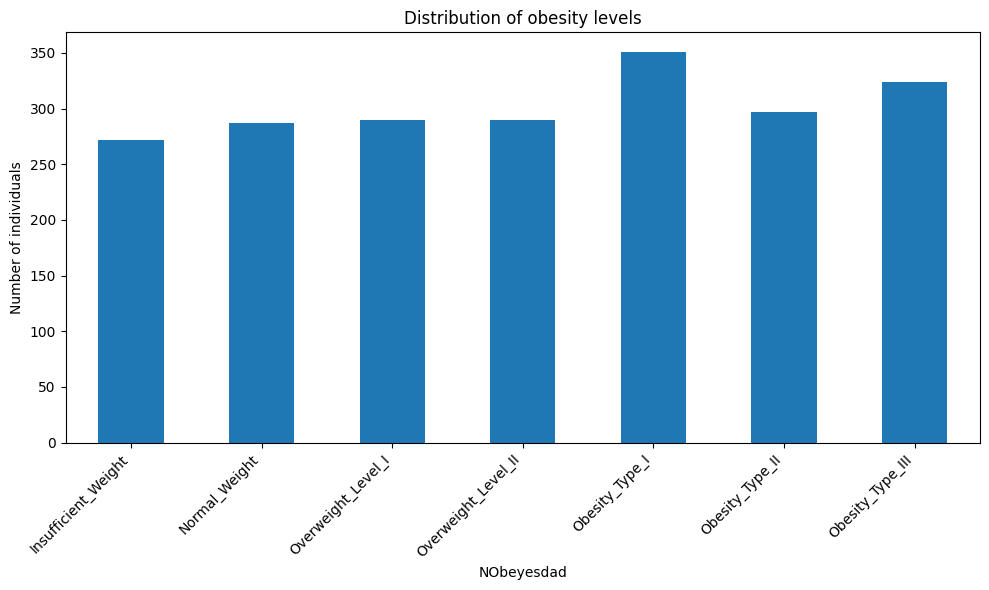

In [65]:
obesity_levels = obesity.groupby('NObeyesdad').size()
labels_order = [
    "Insufficient_Weight",
    "Normal_Weight",
    "Overweight_Level_I",
    "Overweight_Level_II",
    "Obesity_Type_I",
    "Obesity_Type_II",
    "Obesity_Type_III"
]
obesity_levels = obesity_levels.reindex(labels_order)
obesity_levels.plot(kind="bar", figsize=(10,6))

plt.ylabel("Number of individuals")
plt.title("Distribution of obesity levels")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [66]:
numeric_cols = obesity[['Age', 'Height', 'Weight']]
skew = numeric_cols.skew()
print(skew)

Age       1.529100
Height   -0.012855
Weight    0.255410
dtype: float64


Age shows the highest positive skew, indicating that most values are concentrated on the lower end, with a tail extending to higher ages. Weight also has positive skew, but the values are lower and close to zero, suggesting more symmetric distributions. Height has small negative skew, indicating slight left-leaning asymmetry.

## Histograms

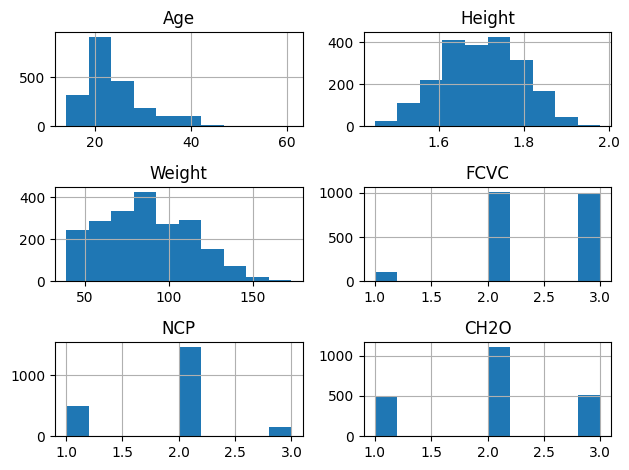

In [67]:
obesity.hist()
plt.tight_layout()

Observing the histograms, we can see that variables with positive skewness (Age, Weight) show a long tail extending to the right, while height has a tail extending to the left. For the categorical features, FCVC (Frequency of consumption of vegetables) is skewed toward higher values, suggesting that most participants tend to eat vegetables frequently. NCP (number of main meals) and CH2O (consumption of water daily), on the other hand, are strongly concentrated around their central category showing limited variability.



## Density plot

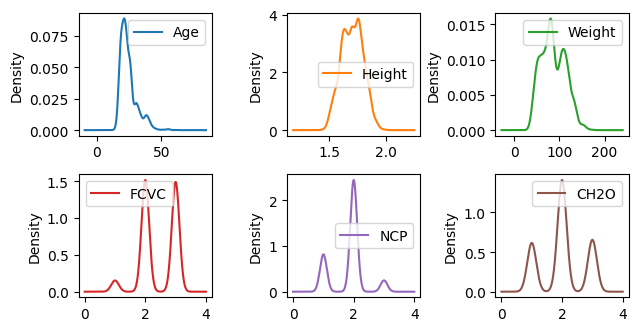

In [68]:
obesity.plot(kind='density', subplots=True, layout=(3,3), sharex=False)
plt.tight_layout()
plt.show()

Consistently with the histograms, features with positive skew, like Age, display long tails extending to the right, whereas Height with slight negative skew shows a left-leaning tail, but it remains the most symmetrical feature. The ordinal variables (FCVC, NCP, and CH2O) present distinct peaks reflecting their discrete response categories rather than continuous variation.

## Box plots

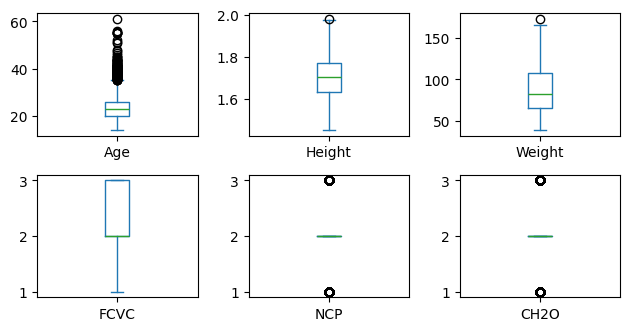

In [69]:
obesity.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

From the box plots, we observe that Age contains several outliers, while Height appears more stable. FCVC (Frequency of consumption of vegetables) is skewed toward higher categories. In contrast, NCP and CH2O (main meals and consumption of water daily) appear nearly flat because the distribution is heavily compressed toward this single category, indicating very low variability.
Outliers were not removed in this study because they could be informative data points and removing them might risk losing important information; however, standardization was applied to place all features on a comparable scale.

In [70]:
numeric_data = obesity.select_dtypes(include=['number'])
correlations = numeric_data.corr(method='spearman')
correlations

,Age,Height,Weight,FCVC,NCP,CH2O
Age,1.000000,-0.002956,0.356771,0.030795,-0.081990,0.026265
Height,-0.002956,1.000000,0.462548,-0.071323,0.209223,0.175841
Weight,0.356771,0.462548,1.000000,0.155682,0.030853,0.191841
FCVC,0.030795,-0.071323,0.155682,1.000000,0.018675,0.051780
NCP,-0.081990,0.209223,0.030853,0.018675,1.000000,0.056870
CH2O,0.026265,0.175841,0.191841,0.051780,0.056870,1.000000


## Correlation Matrix

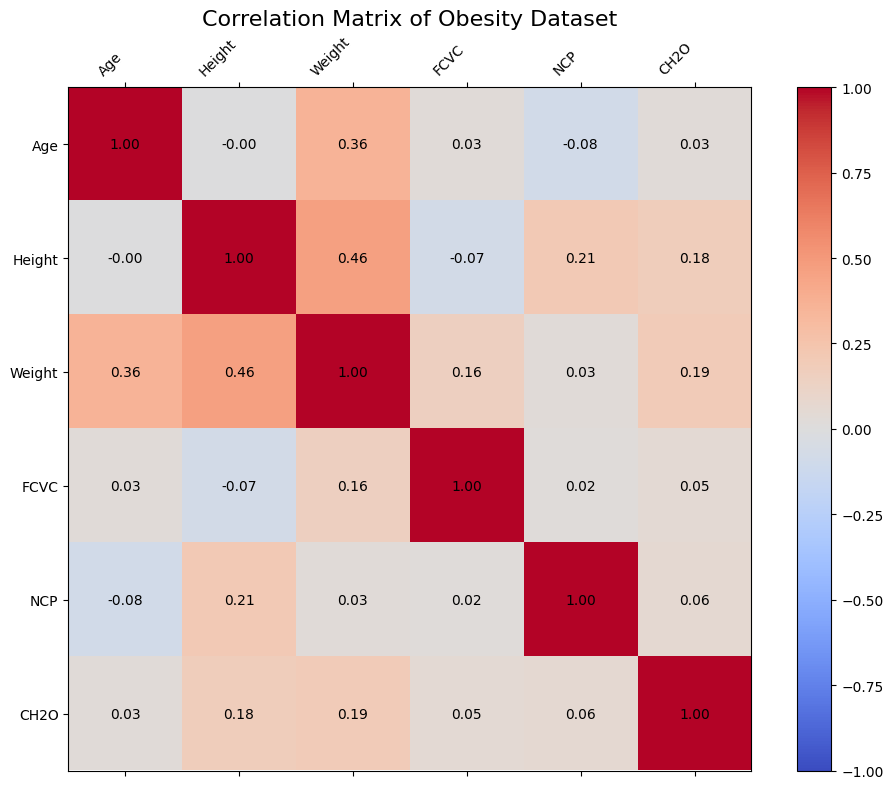


Top 3 Most Positively Correlated Variable Pairs (Spearman):
      Var1    Var2  Correlation
8   Height  Weight     0.462548
2      Age  Weight     0.356771
10  Height     NCP     0.209223

Top 3 Most Negatively Correlated Variable Pairs (Spearman):
    Var1    Var2  Correlation
4    Age     NCP    -0.081990
19  FCVC  Height    -0.071323
1    Age  Height    -0.002956


In [71]:
names = numeric_data.columns  # column names

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

cax = ax.matshow(correlations, vmin=-1, vmax=1, cmap='coolwarm')
fig.colorbar(cax)
ticks = np.arange(len(names))
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names, rotation=45, ha='right')
ax.set_yticklabels(names)

for i in range(len(names)):
    for j in range(len(names)):
        ax.text(j, i, f"{correlations.iloc[i,j]:.2f}", ha='center', va='center', color='black')

plt.title('Correlation Matrix of Obesity Dataset', fontsize=16)
plt.tight_layout()
plt.show()

corr_pairs = correlations.stack().reset_index()
corr_pairs.columns = ['Var1', 'Var2', 'Correlation']

corr_pairs = corr_pairs[corr_pairs['Var1'] < corr_pairs['Var2']]

# Top 3 positive correlations
top_pos = corr_pairs.sort_values('Correlation', ascending=False).head(3)

# Top 3 negative correlations
top_neg = corr_pairs.sort_values('Correlation', ascending=True).head(3)

print("\nTop 3 Most Positively Correlated Variable Pairs (Spearman):")
print(top_pos)

print("\nTop 3 Most Negatively Correlated Variable Pairs (Spearman):")
print(top_neg)


The correlation matrix shows that Height and Weight are the most positively correlated features, which is expected since taller individuals generally tend to have higher body weight. There is also a positive correlation between Age and Weight, suggesting that adults in the dataset tend to weigh more.
The positive relationship between Height and number of main meals (NCP) indicates that taller individuals may consume a slightly higher number of meals per day.
On the other hand, the most negatively correlated pairs are Age and NCP, FCVC (Frequency of consumption of vegetables) and Height, and Age and Height. These negative correlations are very weak, suggesting that there is no evident inverse tendency among these variables.

In [72]:
obesity = obesity.drop(columns = ['Height', 'Weight']) # Remove the columns "Height" and "Weight" from the DataFrame

The features Height and Weight were removed from the dataset to prevent potential data leakage.

Since the target variable (Nobeyesdad) is derived from the Body Mass Index: $$ BMI = \frac{Weight}{(Height)^2} $$

including these variables would allow the model to implicitly reconstruct the target itself.
This would result in artificially high performance, as the predictions would rely almost entirely on those two variables rather than on behavioral or lifestyle features.

## **3. Data Preparation**

In this part of the pipeline, the dataset is first split into training and test sets, separating the features from the target variable. Preprocessing is then applied to the feature set: numerical features are standardized to ensure comparability, categorical features are encoded using one-hot encoding, and binary variables are mapped to 0 and 1.

In [73]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
X = obesity.drop("NObeyesdad", axis=1)   # features
Y = obesity["NObeyesdad"]                # target
test_size = 0.33
seed = 2

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=test_size, random_state=seed
)

num_features = ["Age"] # numerical
bin_features = ["family_history_with_overweight", "FAVC", "SMOKE", "SCC"] #binary
cat_features = ["Gender", "CAEC", "CALC", "MTRANS", "FCVC", "NCP", "CH2O"] # categorical

bin_encoder = OrdinalEncoder(categories=[["no","yes"]] * len(bin_features))

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_features), # scale numerical features
        ("bin", bin_encoder, bin_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features) # encode categorical features
    ],
    remainder="drop"
)



##**4. Baseline Model Comparison with Feature Selection**

In this step, several classification models are trained and evaluated using a consistent preprocessing and feature selection pipeline.
Feature selection is performed with SelectKBest based on the ANOVA F-test, aiming to identify the most informative predictors.
Each model’s performance is assessed using 5-fold stratified cross-validation and evaluated across multiple metrics: accuracy, F1-macro, AUC, and log-loss.
To prevent data leakage, all preprocessing, feature selection, and model fitting steps are encapsulated within a single pipeline, ensuring that feature selection is applied only on the training folds during cross-validation.
The goal of this phase is to select the most promising algorithms for subsequent hyperparameter tuning.

In [74]:
# Define the models to evaluate
models = {
    "LR": LogisticRegression(max_iter=1000),
    "LDA": LinearDiscriminantAnalysis(),
    "NB": GaussianNB(),
    "CART": DecisionTreeClassifier(),
    "SVM": SVC(probability=True)                 # Probability estimates enabled
}

# Define the cross-validation strategy
cv = StratifiedKFold(
    n_splits=5,           # 5-fold stratified cross-validation
    shuffle=True,         # Shuffle data before splitting
    random_state=42       # Set random seed for reproducibility
)

# Define evaluation metrics for cross-validation
scoring = {
    "accuracy": "accuracy",
    "f1_macro": "f1_macro",
    "auc": "roc_auc_ovr",               # (One-vs-Rest for multiclass)
    "logloss": "neg_log_loss"
}

# Initialize a dictionary to store results
results = {}


# Train and evaluate each model using cross-validation
for name, model in models.items():
    # Build a pipeline for each model
    pipe = Pipeline([
        ('preprocessing', preprocessor),               # Apply preprocessing
        ('feature_selection', SelectKBest(f_classif, k=20)),  # Select top 20 features by ANOVA F-test
        ('clf', model)                                 # Train the chosen classifier
    ])

    # Perform cross-validation with multiple metrics
    score = cross_validate(
        pipe,
        X_train, Y_train,
        cv=cv,
        scoring=scoring,         # Evaluate using multiple metrics
        n_jobs=-1
    )

    # Store the mean of each metric across folds in the results dictionary
    results[name] = {
        "Accuracy": np.mean(score["test_accuracy"]),
        "F1_macro": np.mean(score["test_f1_macro"]),
        "AUC": np.mean(score["test_auc"]),
        "LogLoss": -np.mean(score["test_logloss"])
    }


# Summarize results in a sorted DataFrame
summary = pd.DataFrame(results).T.sort_values("AUC", ascending=False)

print("\nSummary of models (mean CV scores):")
print(summary)



Summary of models (mean CV scores):
      Accuracy  F1_macro       AUC   LogLoss
SVM   0.711453  0.704951  0.926962  0.827994
LR    0.598293  0.574824  0.886189  1.054309
LDA   0.582731  0.552481  0.876668  1.197472
CART  0.715006  0.711676  0.839136  9.831156
NB    0.493630  0.421816  0.835608  8.440038


Among the tested models, CART achieves the highest accuracy, but its extremely large log loss suggests that its probability estimates are poorly calibrated, leading to unreliable predictions.
SVM performs consistently well, achieving strong accuracy and the highest AUC, with a reasonably low log loss, indicating both good discrimination and stable probability calibration.
Logistic Regression (LR) provides solid accuracy and moderate AUC, with better calibration than most models, while LDA and Naive Bayes show weaker performance overall.
Based on this analysis, SVM and Logistic Regression were selected for subsequent hyperparameter tuning.

In [75]:
names  = list(results.keys())
scores = [results[m]["Accuracy"] for m in names] # Create a list of the Accuracy scores corresponding to each model

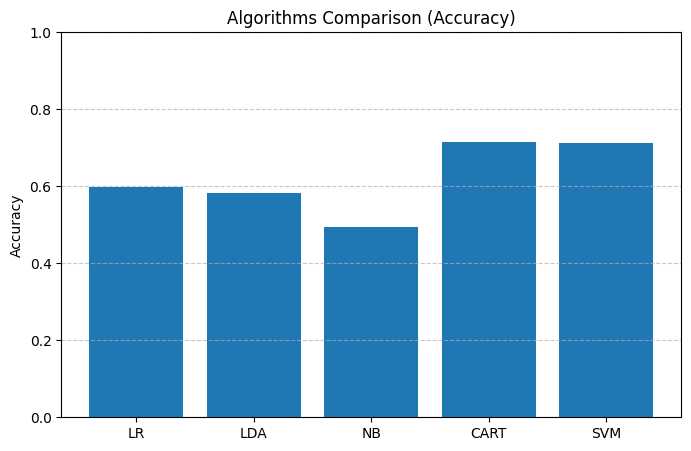

In [76]:
plt.figure(figsize=(8,5))
plt.bar(names, scores)
plt.title('Algorithms Comparison (Accuracy)')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## **6 Model and Feature Selection Optimization**

In this step, a new pipeline is built for the selected models (SVM and Logistic Regression) to perform hyperparameter tuning with integrated feature selection.
The pipeline includes data preprocessing, feature selection using SelectKBest, and model training, all optimized together through GridSearchCV. This process allows selecting the most performant model configuration, which will be used as the final model for evaluation on the test set.

In [ ]:
def model_evaluation(X_train, Y_train, model, fs, preprocessor, param_grid, scoring):
  # Create a pipeline with preprocessing, feature selection, and classifier
  pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('feature_selection', fs),
    ('clf', model)
  ])

  # Define 5-fold stratified cross-validation
  cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

  # Perform grid search with multiple scoring metrics
  grid = GridSearchCV(
      pipeline,
      param_grid,
      cv=cv,
      scoring=scoring,
      refit="f1_macro",   # use F1-macro to select the best model
      n_jobs=1
  )

  # Fit the grid search on the training data
  grid.fit(X_train, Y_train)

  return grid


In [77]:
# Define multiple scoring metrics to be computed during CV
scoring = {
    "accuracy": "accuracy",
    "f1_macro": "f1_macro",
    "recall_macro": "recall_macro",
    "precision_macro": "precision_macro",
    "auc": "roc_auc_ovr",   # one-vs-rest AUC for multiclass
    "logloss": "neg_log_loss"
}

# Models to evaluate (probability=True needed for log_loss/AUC with SVC)
g_model = {
    "LR": LogisticRegression(solver='lbfgs', max_iter=1000),
    "SVM": SVC(probability=True)                              # probability=True for log_loss/AUC
}

# model-specific hyperparameter grids
param_grids = {
    "LR": {
        "feature_selection__k": [10, 20, "all"],  # tune number of selected features (or no FS with "all")
        "clf__C": [0.1, 1, 10],                   # regularization strength
        "clf__penalty": ["l2"],
        "clf__class_weight": [None, "balanced"]   # handle class imbalance if any
    },
    "SVM": {
        "feature_selection__k": [10, 20, "all"],
        "clf__kernel": ["rbf"],
        "clf__C": [1, 5, 10],
        "clf__gamma": ["scale", 0.1]
    }
}

fs = SelectKBest(score_func=f_classif) #k will be set via grid when present

results = []   # hold one summary row per model
grids = {}     # keep fitted GridSearchCV objects by model name

for name, model in g_model.items():
    # Run grid search + CV
    grid = model_evaluation(X_train, Y_train, model, fs, preprocessor, param_grids[name], scoring)
    grids[name] = grid

    best_idx = grid.best_index_ # Index of the best parameter set

    # Start a summary row for this model
    row = {
        "Model": name,
        "Best Score (refit)": grid.best_score_,  # mean CV score for the refit metric
    }

    # For each metric, extract the mean CV score at the best params
    for key in scoring.keys():
        row[f"{key} (CV)"] = grid.cv_results_[f"mean_test_{key}"][best_idx]

    results.append(row)

# build and print the final summary table
summary = pd.DataFrame(results).sort_values(
    by="Best Score (refit)", ascending=False
).reset_index(drop=True)
print(summary)


  Model  Best Score (refit)  accuracy (CV)  f1_macro (CV)  recall_macro (CV)  \
0   SVM            0.728652       0.736912       0.728652           0.737009   
1    LR            0.603980       0.616700       0.603980           0.618068   

   precision_macro (CV)  auc (CV)  logloss (CV)  
0              0.732657  0.935242     -0.779951  
1              0.607361  0.886882     -1.069167  


After hyperparameter tuning using 5-fold cross-validation, SVM achieved the highest scores across all evaluation metrics.
Both SVM and Logistic Regression (LR) obtained high AUC values; however, SVM consistently outperformed LR in accuracy, F1-macro, recall, and precision, while also showing better probability calibration (lower log loss). For these reasons, SVM was selected as the final model for evaluation on the test set.

##**6. Model Evaluation on the Test Set**

SVM has been chosen as the final model, and its performance (measured through Accuracy, Log Loss, AUC, F1 Macro and the confusion matrix) will be evaluated on the test set.

In [78]:
svm_grid = grids["SVM"] # Retrieve the GridSearchCV object for the SVM model
final_model = svm_grid.best_estimator_ # Extract the best estimator (the pipeline with the best hyperparameters)

# Make predictions on the test set
y_pred = final_model.predict(X_test)
y_proba = final_model.predict_proba(X_test)


SVM (best from GridSearchCV):
Accuracy:  0.7475
F1_macro:  0.7350
AUC:       0.9376
LogLoss:   0.7647

Classification Report:

                     precision    recall  f1-score   support

Insufficient_Weight       0.69      0.88      0.77        88
      Normal_Weight       0.68      0.54      0.60       101
     Obesity_Type_I       0.71      0.69      0.70       108
    Obesity_Type_II       0.81      0.88      0.85       109
   Obesity_Type_III       0.98      0.98      0.98       113
 Overweight_Level_I       0.61      0.66      0.63        85
Overweight_Level_II       0.68      0.56      0.61        93

           accuracy                           0.75       697
          macro avg       0.74      0.74      0.74       697
       weighted avg       0.75      0.75      0.74       697



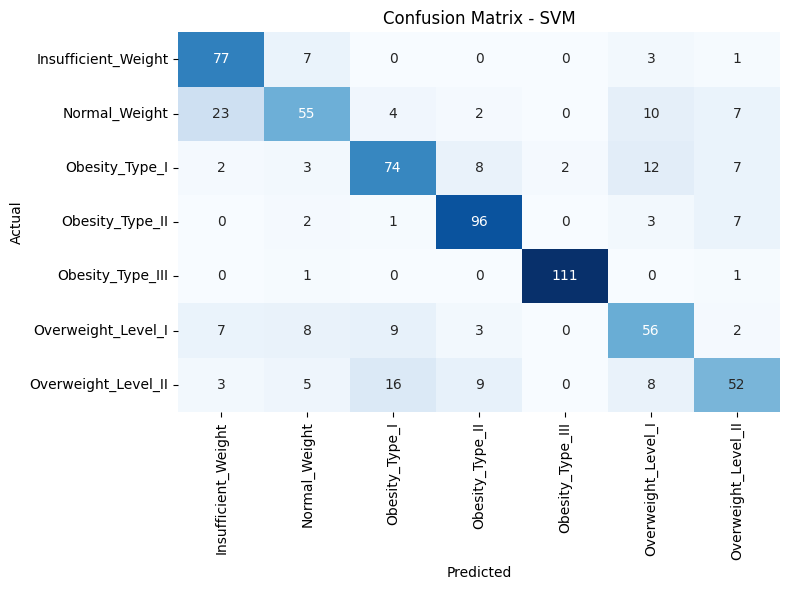

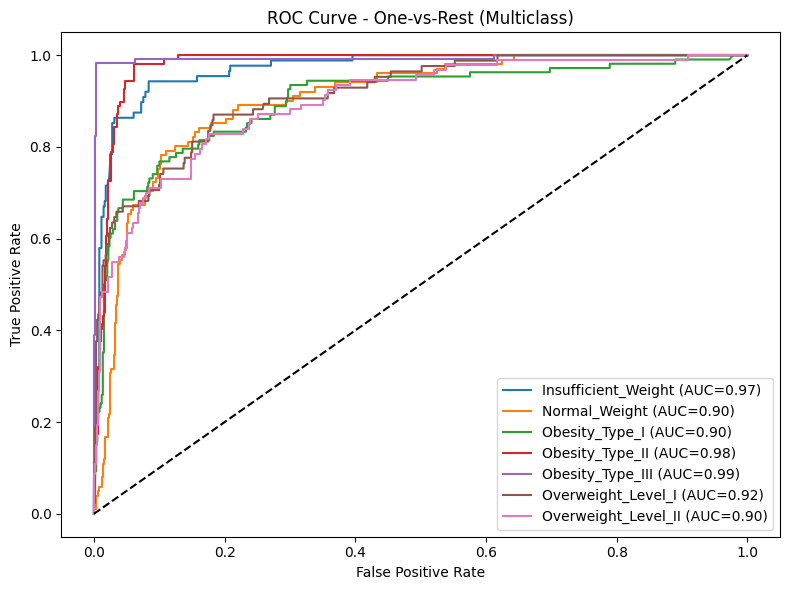

In [79]:
classes = final_model.classes_ # Classes learned by the fitted model

Y_test_bin = label_binarize(Y_test, classes=classes) # Binarize y for multiclass ROC (one-vs-rest) curves

# Main metrics on the hold-out test set
acc = accuracy_score(Y_test, y_pred)                      # overall accuracy
f1  = f1_score(Y_test, y_pred, average="macro")           # macro-averaged F1 across classes
ll  = log_loss(Y_test, y_proba)                           # log loss
auc_val = roc_auc_score(Y_test, y_proba,                  # multiclass AUC (OvR)
                        multi_class="ovr", average="macro")

print("SVM (best from GridSearchCV):")
print(f"Accuracy:  {acc:.4f}")
print(f"F1_macro:  {f1:.4f}")
print(f"AUC:       {auc_val:.4f}")
print(f"LogLoss:   {ll:.4f}\n")

print("Classification Report:\n")
print(classification_report(
    Y_test, y_pred,
    labels=classes,                     # ensures rows/columns align with model.classes_
    target_names=[str(c) for c in classes]
))

# Confusion matrix (ordered by 'classes')
cm = confusion_matrix(Y_test, y_pred, labels=classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM')
plt.tight_layout()
plt.show()

# ROC curves (one-vs-rest) using binarized labels and predicted probabilities
plt.figure(figsize=(8, 6))
for i, cls in enumerate(classes):
    fpr, tpr, _ = roc_curve(Y_test_bin[:, i], y_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{cls} (AUC={roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - One-vs-Rest (Multiclass)")
plt.legend()
plt.tight_layout()
plt.show()


The final SVM model shows strong generalization performance on the test set, with an accuracy of 74.75%, macro F1 of 0.74, and a multiclass AUC of 0.94, indicating good overall discrimination ability.
The Obesity_Type_III class achieves nearly perfect precision, recall, and F1-scores (>0.95), suggesting that this class is easily separable from the others, likely due to its distinct feature patterns.
In contrast, classes such as Overweight_Level_I and Normal_Weight show moderate performance, indicating the challenge of distinguishing borderline categories. Also, some misclassifications occur between adjacent weight levels.
Overall, the model provides a balanced and well-calibrated performance, demonstrating its ability to generalize across the seven weight classes.

